<a href="https://colab.research.google.com/github/InowaR/colab/blob/main/path_planning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

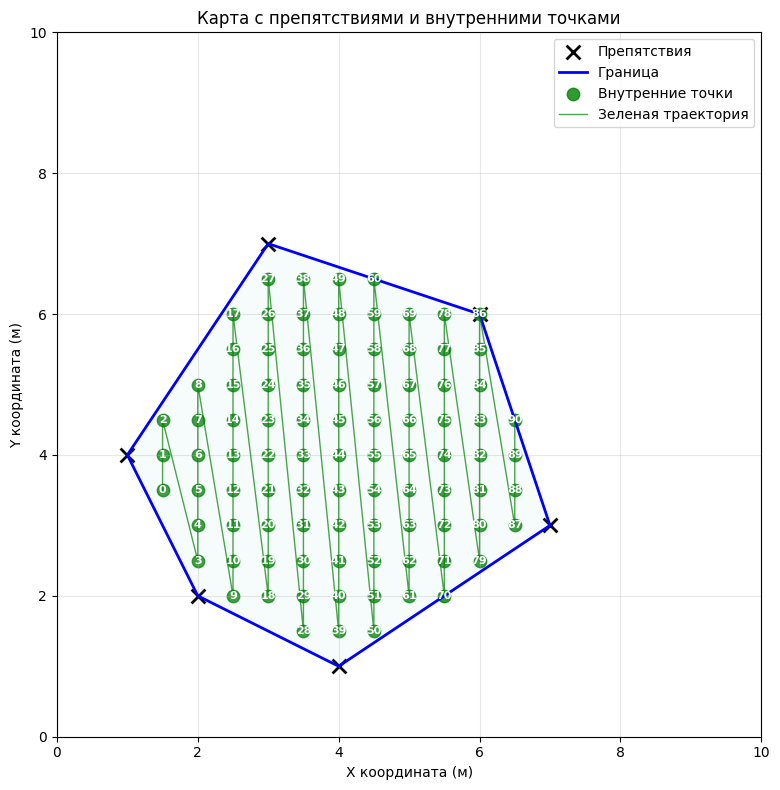

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull
import matplotlib.patches as patches

# Создаем карту 10x10 метров
map_size = 10
fig, ax = plt.subplots(figsize=(8, 8))

# Двойной массив numpy с 6 точками препятствий
obstacles = np.array([
    [2, 2],   # Точка 0
    [4, 1],   # Точка 1
    [7, 3],   # Точка 2
    [6, 6],   # Точка 3
    [3, 7],   # Точка 4
    [1, 4]    # Точка 5
])

# Отображаем препятствия черными крестиками (без подписей)
ax.scatter(obstacles[:, 0], obstacles[:, 1], color='black', marker='x', s=100, linewidth=2, label='Препятствия')

# Строим выпуклую оболочку для создания замкнутой фигуры
hull = ConvexHull(obstacles)

# Рисуем замкнутую фигуру (синяя линия)
hull_points = obstacles[hull.vertices]
hull_points = np.vstack([hull_points, hull_points[0]])  # Замыкаем фигуру
ax.plot(hull_points[:, 0], hull_points[:, 1], 'b-', linewidth=2, label='Граница')

# Создаем полигон из выпуклой оболочки
polygon = patches.Polygon(obstacles[hull.vertices], closed=True, alpha=0.1, fill=True, color='lightblue')

# Генерируем равномерно распределенные точки внутри фигуры
def generate_points_in_polygon(polygon_vertices, spacing=0.5):
    # Находим ограничивающий прямоугольник
    min_x, min_y = np.min(polygon_vertices, axis=0)
    max_x, max_y = np.max(polygon_vertices, axis=0)

    # Создаем сетку точек
    x_coords = np.arange(min_x, max_x, spacing)
    y_coords = np.arange(min_y, max_y, spacing)

    # Проверяем, какие точки находятся внутри полигона
    inside_points = []
    for x in x_coords:
        for y in y_coords:
            point = np.array([x, y])
            if point_inside_polygon(point, polygon_vertices):
                inside_points.append([x, y])

    return np.array(inside_points)

def point_inside_polygon(point, polygon):
    """Проверяет, находится ли точка внутри полигона (алгоритм ray casting)"""
    x, y = point
    n = len(polygon)
    inside = False

    p1x, p1y = polygon[0]
    for i in range(1, n + 1):
        p2x, p2y = polygon[i % n]
        if y > min(p1y, p2y):
            if y <= max(p1y, p2y):
                if x <= max(p1x, p2x):
                    if p1y != p2y:
                        xinters = (y - p1y) * (p2x - p1x) / (p2y - p1y) + p1x
                    if p1x == p2x or x <= xinters:
                        inside = not inside
        p1x, p1y = p2x, p2y

    return inside

# Генерируем точки внутри фигуры
inner_points = generate_points_in_polygon(obstacles[hull.vertices], spacing=0.5)

# Отображаем зеленые точки внутри фигуры (увеличиваем размер)
if len(inner_points) > 0:
    ax.scatter(inner_points[:, 0], inner_points[:, 1], color='green', s=80, alpha=0.8, label='Внутренние точки')

    # Добавляем белую нумерацию для зеленых точек
    for i, point in enumerate(inner_points):
        ax.text(point[0], point[1], str(i), fontsize=8, ha='center', va='center', color='white', weight='bold')

# Проводим зеленую линию по зеленым точкам
if len(inner_points) > 0:
    ax.plot(inner_points[:, 0], inner_points[:, 1], 'g-', linewidth=1, alpha=0.7, label='Зеленая траектория')

# Настраиваем отображение
ax.set_xlim(0, map_size)
ax.set_ylim(0, map_size)
ax.set_xlabel('X координата (м)')
ax.set_ylabel('Y координата (м)')
ax.set_title('Карта с препятствиями и внутренними точками')
ax.grid(True, alpha=0.3)
ax.legend()
ax.set_aspect('equal')

# Добавляем полигон на карту
ax.add_patch(polygon)

plt.tight_layout()
plt.show()